
## Text Analysis 

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#import clean data
import pandas as pd
updated_youtube_data = pd.read_csv('./updated_youtube_data.csv')
updated_youtube_data.shape

(6237, 18)

In [ ]:
df = updated_youtube_data.copy()

In [ ]:
temp = df.loc[: ,["id","title","channel_title", "tags", "category_name", "description","likes", "views", "dislikes"]]
#temp["likes_dislikes_ratio"]= np.log(temp["likes"]/(temp["likes"] +temp["dislikes"]))
temp["likes_over_views"]= temp["likes"]/(temp["views"])
temp.head(2)

,id,title,channel_title,tags,category_name,description,likes,views,dislikes,likes_over_views
0,24.0,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,"ellen|""ellen degeneres""|""the ellen show""|""elle...",Entertainment,Ocean's 8 star Mindy Kaling dished on bringing...,9773.0,800359.0,332.0,0.012211
1,24.0,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,"megan mullally|""megan""|""mullally""|""will and gr...",Entertainment,Ellen and Megan Mullally have known each other...,4429.0,563746.0,54.0,0.007856


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
temp.loc[:, ["likes","views", "likes_over_views"]].describe(percentiles= [0.01,0.1,0.75,0.9,0.95,0.97,0.99]).reset_index()

,index,likes,views,likes_over_views
0,count,6237.00,6237.00,6237.00
1,mean,53390.30,1778757.15,0.03
2,std,184535.55,6072795.32,0.03
3,min,0.00,559.00,0.00
4,1%,8.00,2808.96,0.00
5,10%,455.60,39986.00,0.01
6,50%,11894.00,501719.00,0.02
7,75%,37777.00,1392722.00,0.04
8,90%,115412.40,3508741.40,0.06
9,95%,200997.40,6107330.80,0.08


<Axes: xlabel='likes_over_views', ylabel='Count'>

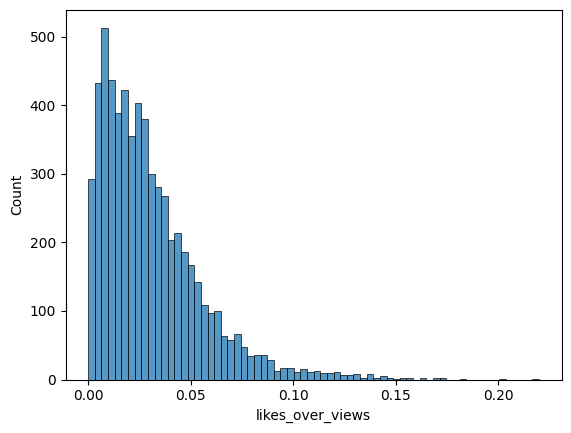

In [ ]:
sns.histplot(temp.likes_over_views)

In [ ]:
temp.loc[temp.likes_over_views >= 0, "trend_type"] = "not_trending"
temp.loc[temp.likes_over_views >= 0.02, "trend_type"] = "not_so_trending"
temp.loc[temp.likes_over_views >= 0.04, "trend_type"] = "trending"
temp.loc[temp.likes_over_views >= 0.06, "trend_type"] = "super_trending"
temp.loc[temp.likes_over_views >= 0.09, "trend_type"] = "super_duper_trending"

temp.loc[temp.trend_type == "not_trending", "trend_rank"] = 1
temp.loc[temp.trend_type == "not_so_trending", "trend_rank"] = 2
temp.loc[temp.trend_type == "trending", "trend_rank"] = 3
temp.loc[temp.trend_type == "super_trending", "trend_rank"] = 4
temp.loc[temp.trend_type == "super_duper_trending", "trend_rank"] = 5

temp.trend_type.value_counts()/len(temp)

not_trending           0.41
not_so_trending        0.32
trending               0.16
super_trending         0.08
super_duper_trending   0.03
Name: trend_type, dtype: float64

In [ ]:
temp.head(2)

,id,title,channel_title,tags,category_name,description,likes,views,dislikes,likes_over_views,trend_type,trend_rank
0,24.00,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,"ellen|""ellen degeneres""|""the ellen show""|""elle...",Entertainment,Ocean's 8 star Mindy Kaling dished on bringing...,9773.00,800359.00,332.00,0.01,not_trending,1.00
1,24.00,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,"megan mullally|""megan""|""mullally""|""will and gr...",Entertainment,Ellen and Megan Mullally have known each other...,4429.00,563746.00,54.00,0.01,not_trending,1.00


In [ ]:
text = temp.copy()
text["concat_text"] = text["title"]  + ' ' + text["channel_title"] + ' ' +text["tags"] + " " + text["category_name"] + " " + text["description"]

In [ ]:
keep_list = ["concat_text", "title", "trend_type", "likes","dislikes","trend_rank"]
text= text.loc[:, keep_list]
text.head(2)

,concat_text,title,trend_type,likes,dislikes,trend_rank
0,Mindy Kaling's Daughter Had the Perfect Reacti...,Mindy Kaling's Daughter Had the Perfect Reacti...,not_trending,9773.00,332.00,1.00
1,Megan Mullally Didn't Notice the Interesting P...,Megan Mullally Didn't Notice the Interesting P...,not_trending,4429.00,54.00,1.00


In [ ]:
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([j.replace("'","") for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([j.replace(".","") for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([re.sub("^'+","",j) for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([re.sub("/","",j) for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([re.sub("|","",j) for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([re.sub("-","",j) for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([j.replace(":","") for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([j.replace("+","") for j in word_tokenize(str(x))]))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub(' +', ' ',x))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub('\n', ' ',x))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub('\n\n', ' ',x))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub('\n\n\n', ' ',x))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub('https*[a-z]+', ' ',x))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub('nhttp*[a-z]+', ' ',x))
text["concat_text"] = text["concat_text"].apply(lambda x: re.sub(rf'[|]', ' ',x))

In [ ]:
text["title"] = text["title"].apply(lambda x: " ".join([j.replace("'","") for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([j.replace(".","") for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([re.sub("^'+","",j) for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([re.sub("/","",j) for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([re.sub("|","",j) for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([re.sub("-","",j) for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([j.replace(":","") for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: " ".join([j.replace("+","") for j in word_tokenize(str(x))]))
text["title"] = text["title"].apply(lambda x: re.sub(' +', ' ',x))
text["title"] = text["title"].apply(lambda x: re.sub('\n', ' ',x))
text["title"] = text["title"].apply(lambda x: re.sub('https*[a-z]+', ' ',x))
text["title"] = text["title"].apply(lambda x: re.sub('nhttp*[a-z]+', ' ',x))
text["title"] = text["title"].apply(lambda x: re.sub(rf'[|]', ' ',x))

In [ ]:
def containsNonAscii(s):
    return any(ord(i)>127 for i in s)

In [ ]:
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([j for j in word_tokenize(str(x)) if containsNonAscii(j)==False]))
text["title"] = text["title"].apply(lambda x: " ".join([j for j in word_tokenize(str(x)) if containsNonAscii(j)==False]))

In [ ]:
text["concat_text"] = text["concat_text"].apply(lambda x: " ".join([j for j in word_tokenize(str(x)) if len(j)> 1]))
text["title"] = text["title"].apply(lambda x: " ".join([j for j in word_tokenize(str(x)) if len(j) > 1]))

In [ ]:
text.head()

,concat_text,title,trend_type,likes,dislikes,trend_rank
0,Mindy Kaling Daughter Had the Perfect Reaction...,Mindy Kaling Daughter Had the Perfect Reaction...,not_trending,9773.00,332.00,1.00
1,Megan Mullally Did nt Notice the Interesting P...,Megan Mullally Did nt Notice the Interesting P...,not_trending,4429.00,54.00,1.00
2,Cast of Avengers Infinity War Draws Their Char...,Cast of Avengers Infinity War Draws Their Char...,not_so_trending,38165.00,530.00,2.00
3,YOUTUBER QUIZ TRUTH OR DARE THE MERRELL TWINS ...,YOUTUBER QUIZ TRUTH OR DARE THE MERRELL TWINS,not_so_trending,6950.00,184.00,2.00
4,2017 Champions Showdown Day Saint Louis Chess ...,2017 Champions Showdown Day,not_trending,460.00,27.00,1.00


In [ ]:
#text.to_csv("text_clean.csv")

## Data Visualization

### WordCloud on all text columns 

In [ ]:
# visualize the data on a WordCloud by drawing the most relevant words
#!pip install wordcloud

from wordcloud import WordCloud
def visualize(label):
    words = ''
    for msg in text[text["trend_rank"] == label]["concat_text"]:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=600).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

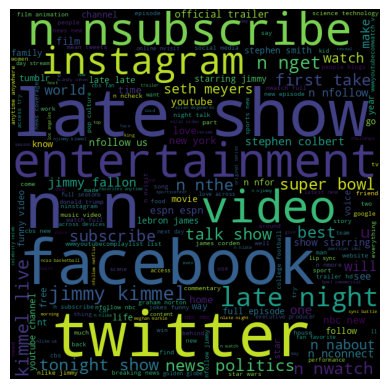

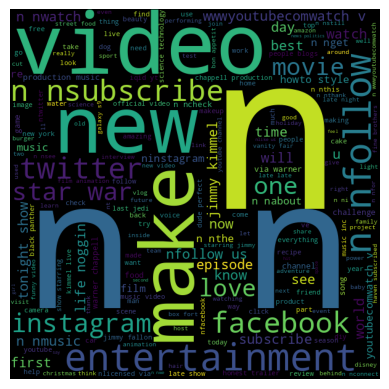

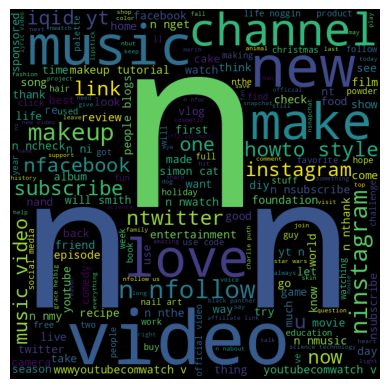

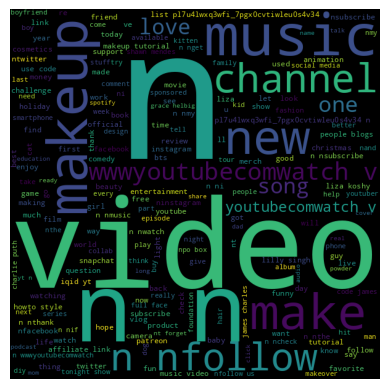

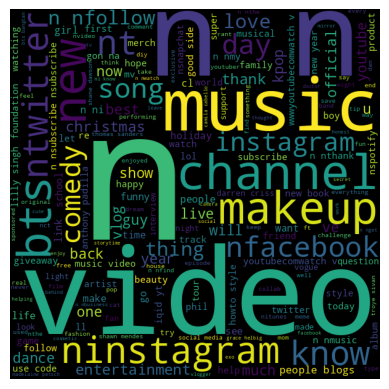

(None, None, None, None, None)

In [ ]:
visualize(1), visualize(2), visualize(3), visualize(4), visualize(5)
#rank lowest is no trending, rank highest is very trending 

#### "Description" column contains many "n" letters despite cleaning the texts, which is skewing the results. In the next step, we will visualize "title" column

### WordCloud on only title column

In [ ]:
# visualize the data on a WordCloud by drawing the most relevant words
#!pip install wordcloud

from wordcloud import WordCloud

def visualize(label):
    words = ''
    for msg in text[text["trend_rank"] == label]["title"]:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=600).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

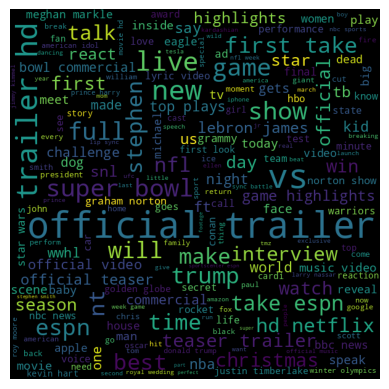

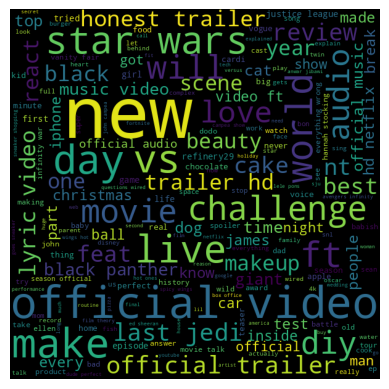

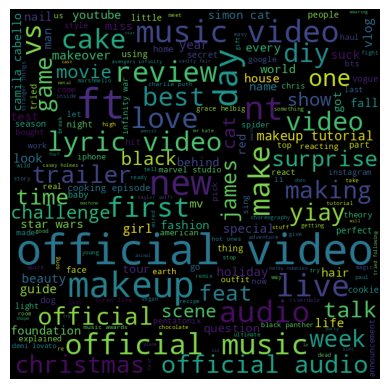

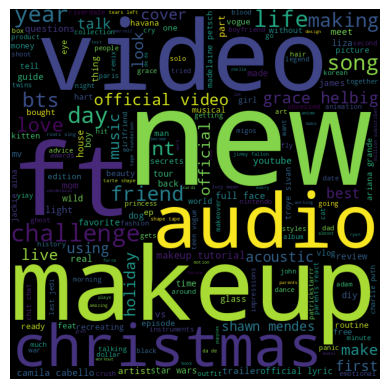

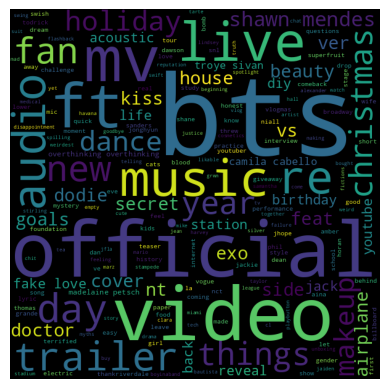

(None, None, None, None, None)

In [ ]:
visualize(1), visualize(2), visualize(3), visualize(4), visualize(5)
#rank lowest is no trending, rank highest is very trending 

## Topic Modeling

In [ ]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
#from bs4 import BeautifulSoup, re
from requests import get
import pandas as pd
import time
#from bs4 import Tag, NavigableString, BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

/Users/simranpadam/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 3 :
            result.append(token)
    return result

In [ ]:
def return_lda_topic(text_list,no_below=5, no_above=0.8, keep_n=10000,num_topics=5):
    full_text =[]
    for j in text_list:
        text = preprocess(j)
        full_text.append(text)
    dictionary = gensim.corpora.Dictionary(full_text)
    dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=keep_n)
    bow_corpus = [dictionary.doc2bow(doc) for doc in full_text]
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, 
                                           id2word=dictionary, passes=10, workers=2, random_state = 10)

    return(lda_model,bow_corpus)

In [ ]:
text_class1 = text.loc[text.trend_rank == 1, :]
text_class2 = text.loc[text.trend_rank == 2, :]
text_class3 = text.loc[text.trend_rank == 3, :]
text_class4 = text.loc[text.trend_rank == 4, :]
text_class5 = text.loc[text.trend_rank == 5, :]

In [ ]:
# dict of topic words and weights 
dict_of_words_topics = {}
model,corpus = return_lda_topic(text_class1['title'].values,num_topics=5)
for idx  in range(model.num_topics):
    print("Topic {} : {}".format(idx+1, model.print_topic(idx)))
    dict_of_words_topics[idx]=model.show_topic(idx)
    print("\n")

Topic 1 : 0.032*"trump" + 0.021*"day" + 0.020*"live" + 0.016*"look" + 0.014*"nbc" + 0.014*"christmas" + 0.013*"news" + 0.013*"today" + 0.013*"best" + 0.012*"house"


Topic 2 : 0.048*"espn" + 0.039*"game" + 0.022*"james" + 0.022*"stephen" + 0.019*"lebron" + 0.017*"nba" + 0.015*"time" + 0.015*"big" + 0.015*"challenge" + 0.014*"video"


Topic 3 : 0.116*"official" + 0.104*"trailer" + 0.030*"super" + 0.027*"bowl" + 0.027*"video" + 0.024*"teaser" + 0.020*"commercial" + 0.020*"netflix" + 0.019*"season" + 0.014*"movie"


Topic 4 : 0.026*"news" + 0.015*"home" + 0.014*"kardashian" + 0.014*"bbc" + 0.013*"fox" + 0.013*"face" + 0.013*"baby" + 0.012*"interview" + 0.012*"voice" + 0.011*"kim"


Topic 5 : 0.030*"nfl" + 0.026*"highlights" + 0.019*"new" + 0.019*"night" + 0.018*"plays" + 0.017*"american" + 0.015*"meghan" + 0.013*"week" + 0.012*"game" + 0.012*"school"




In [ ]:
# dict of topic words and weights 
dict_of_words_topics = {}
model,corpus = return_lda_topic(text_class2['title'].values,num_topics=5)
for idx  in range(model.num_topics):
    print("Topic {} : {}".format(idx+1, model.print_topic(idx)))
    dict_of_words_topics[idx]=model.show_topic(idx)
    print("\n")

Topic 1 : 0.029*"diy" + 0.025*"like" + 0.023*"time" + 0.020*"cat" + 0.015*"tried" + 0.014*"giant" + 0.014*"iphone" + 0.014*"got" + 0.014*"slow" + 0.014*"test"


Topic 2 : 0.059*"video" + 0.045*"official" + 0.036*"audio" + 0.029*"music" + 0.022*"honest" + 0.021*"lyric" + 0.021*"feat" + 0.021*"cake" + 0.021*"live" + 0.020*"trailers"


Topic 3 : 0.054*"new" + 0.049*"star" + 0.041*"wars" + 0.029*"movie" + 0.027*"jedi" + 0.022*"review" + 0.019*"react" + 0.016*"refinery" + 0.016*"talk" + 0.015*"wrong"


Topic 4 : 0.037*"world" + 0.030*"challenge" + 0.024*"perfect" + 0.019*"wired" + 0.018*"bon" + 0.018*"ball" + 0.017*"test" + 0.015*"night" + 0.014*"questions" + 0.014*"voice"


Topic 5 : 0.082*"official" + 0.048*"trailer" + 0.040*"video" + 0.030*"black" + 0.022*"food" + 0.022*"season" + 0.020*"day" + 0.019*"netflix" + 0.018*"best" + 0.016*"beauty"




In [ ]:
# dict of topic words and weights 
dict_of_words_topics = {}
model,corpus = return_lda_topic(text_class3['title'].values,num_topics=5)
for idx  in range(model.num_topics):
    print("Topic {} : {}".format(idx+1, model.print_topic(idx)))
    dict_of_words_topics[idx]=model.show_topic(idx)
    print("\n")

Topic 1 : 0.066*"audio" + 0.052*"love" + 0.046*"makeover" + 0.039*"episode" + 0.038*"talk" + 0.032*"cooking" + 0.032*"suck" + 0.032*"got" + 0.028*"room" + 0.025*"home"


Topic 2 : 0.053*"tutorial" + 0.052*"day" + 0.049*"diy" + 0.042*"tried" + 0.039*"youtube" + 0.032*"life" + 0.030*"makeup" + 0.028*"fashion" + 0.028*"time" + 0.028*"world"


Topic 3 : 0.206*"video" + 0.204*"official" + 0.062*"music" + 0.037*"audio" + 0.036*"lyric" + 0.033*"new" + 0.028*"trailer" + 0.027*"making" + 0.025*"feat" + 0.025*"things"


Topic 4 : 0.094*"makeup" + 0.053*"live" + 0.030*"best" + 0.029*"cat" + 0.027*"face" + 0.025*"casey" + 0.025*"vogue" + 0.025*"challenge" + 0.024*"new" + 0.022*"hot"


Topic 5 : 0.070*"black" + 0.053*"week" + 0.046*"christmas" + 0.035*"star" + 0.032*"guide" + 0.028*"house" + 0.028*"review" + 0.028*"wars" + 0.025*"bad" + 0.025*"people"




In [ ]:
# dict of topic words and weights 
dict_of_words_topics = {}
model,corpus = return_lda_topic(text_class4['title'].values,num_topics=5)
for idx  in range(model.num_topics):
    print("Topic {} : {}".format(idx+1, model.print_topic(idx)))
    dict_of_words_topics[idx]=model.show_topic(idx)
    print("\n")

Topic 1 : 0.133*"challenge" + 0.115*"day" + 0.091*"vogue" + 0.078*"house" + 0.077*"meet" + 0.077*"questions" + 0.065*"time" + 0.065*"parents" + 0.063*"favorite" + 0.053*"liza"


Topic 2 : 0.188*"makeup" + 0.075*"making" + 0.067*"live" + 0.067*"mendes" + 0.059*"shawn" + 0.059*"cover" + 0.059*"face" + 0.059*"camila" + 0.051*"like" + 0.050*"cabello"


Topic 3 : 0.114*"bts" + 0.112*"song" + 0.095*"holiday" + 0.088*"acoustic" + 0.077*"look" + 0.077*"trailer" + 0.074*"best" + 0.064*"wild" + 0.057*"official" + 0.044*"music"


Topic 4 : 0.186*"video" + 0.132*"official" + 0.096*"christmas" + 0.090*"audio" + 0.090*"grace" + 0.068*"helbig" + 0.038*"guide" + 0.038*"review" + 0.034*"talk" + 0.033*"year"


Topic 5 : 0.247*"new" + 0.100*"love" + 0.097*"life" + 0.078*"star" + 0.067*"youtube" + 0.067*"real" + 0.056*"boy" + 0.056*"wars" + 0.052*"friends" + 0.046*"audio"




In [ ]:
# dict of topic words and weights 
dict_of_words_topics = {}
model,corpus = return_lda_topic(text_class5['title'].values,num_topics=5)
for idx  in range(model.num_topics):
    print("Topic {} : {}".format(idx+1, model.print_topic(idx)))
    dict_of_words_topics[idx]=model.show_topic(idx)
    print("\n")

Topic 1 : 0.486*"live" + 0.419*"video" + 0.014*"bts" + 0.014*"official" + 0.014*"day" + 0.014*"trailer" + 0.014*"audio" + 0.014*"music" + 0.014*"love"


Topic 2 : 0.619*"bts" + 0.198*"trailer" + 0.130*"official" + 0.015*"music" + 0.008*"love" + 0.008*"video" + 0.008*"live" + 0.008*"day" + 0.008*"audio"


Topic 3 : 0.764*"day" + 0.030*"video" + 0.029*"bts" + 0.029*"official" + 0.029*"live" + 0.029*"love" + 0.029*"music" + 0.029*"trailer" + 0.029*"audio"


Topic 4 : 0.319*"official" + 0.262*"video" + 0.192*"music" + 0.166*"love" + 0.036*"bts" + 0.007*"trailer" + 0.007*"audio" + 0.006*"live" + 0.006*"day"


Topic 5 : 0.588*"audio" + 0.251*"official" + 0.023*"video" + 0.023*"bts" + 0.023*"love" + 0.023*"live" + 0.023*"trailer" + 0.023*"day" + 0.023*"music"




# Classification models

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X = text.loc[:, ["concat_text"]]
y = text.loc[:,["trend_rank"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4365, 1), (1872, 1), (4365, 1), (1872, 1))

### Using Countvectorizer to generate text features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vectorizer = CountVectorizer(decode_error='ignore', lowercase=True,stop_words= "english", max_df= 0.9)
train = count_vectorizer.fit_transform(X_train.values.astype('U').ravel())
test = count_vectorizer.transform(X_test.values.astype('U').ravel())

In [ ]:
print('Train size: ',train.shape)
print('Test size: ',test.shape)

Train size:  (4365, 62968)
Test size:  (1872, 62968)


In [ ]:
vocab = list(count_vectorizer.vocabulary_.items())
print(vocab[:10])

[('ashanti', 4632), ('speaks', 48461), ('irv', 24980), ('gotti', 21014), ('murder', 31660), ('everyday', 16951), ('struggle', 49452), ('complex', 12068), ('sneakerhead', 47927), ('originals', 39302)]


In [ ]:
parameters = {'n_estimators' : [50,200,50], "max_depth" : [1,8,1]}
rf_model= GridSearchCV(RandomForestClassifier(random_state=42), parameters)
rf_model.fit(train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 8, 1], 'n_estimators': [50, 200, 50]})

In [ ]:
rf_model.best_score_, rf_model.best_params_

(0.4600229095074456, {'max_depth': 8, 'n_estimators': 50})

In [ ]:
rf_model= RandomForestClassifier(random_state=42, n_estimators= 50, max_depth=8)
rf_model.fit(train, y_train)

<ipython-input-36-5023991c185a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [ ]:
y_pred = rf_model.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.46      0.98      0.63       765
         2.0       0.48      0.18      0.26       595
         3.0       0.58      0.05      0.09       304
         4.0       0.00      0.00      0.00       150
         5.0       0.00      0.00      0.00        58

    accuracy                           0.46      1872
   macro avg       0.30      0.24      0.20      1872
weighted avg       0.44      0.46      0.35      1872



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sgd_model= SGDClassifier(random_state=42)
sgd_model.fit(train, y_train)
y_pred = sgd_model.predict(test)
print(classification_report(y_test, y_pred))

/Users/simranpadam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         1.0       0.73      0.76      0.75       765
         2.0       0.53      0.49      0.51       595
         3.0       0.34      0.39      0.36       304
         4.0       0.37      0.34      0.35       150
         5.0       0.36      0.22      0.28        58

    accuracy                           0.56      1872
   macro avg       0.47      0.44      0.45      1872
weighted avg       0.56      0.56      0.56      1872



#### Using One vs rest Classifier to improve model performance as response variable is imbalanced

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(random_state=42)).fit(train, y_train)
y_pred = clf.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.88      0.76       765
         2.0       0.55      0.54      0.54       595
         3.0       0.43      0.29      0.34       304
         4.0       0.50      0.20      0.29       150
         5.0       0.57      0.21      0.30        58

    accuracy                           0.60      1872
   macro avg       0.54      0.42      0.45      1872
weighted avg       0.58      0.60      0.57      1872



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
param_grid = {'estimator__C':[1,10,100,1000],'estimator__kernel':['linear','rbf']}
clf = GridSearchCV(OneVsRestClassifier(SVC(random_state=42)), param_grid).fit(train, y_train)
clf.best_params_

{'estimator__C': 10, 'estimator__kernel': 'rbf'}

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(random_state=42, C =10, kernel= 'rbf')).fit(train, y_train)
y_pred = clf.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.82      0.77       765
         2.0       0.56      0.56      0.56       595
         3.0       0.38      0.33      0.35       304
         4.0       0.39      0.28      0.33       150
         5.0       0.48      0.28      0.35        58

    accuracy                           0.60      1872
   macro avg       0.51      0.45      0.47      1872
weighted avg       0.58      0.60      0.59      1872



#### Using Tfdif vectorizer to generate text features

In [ ]:
Tfidf_Vectorizer= TfidfVectorizer(max_df = 0.9, ngram_range=(1, 1),stop_words = "english" )
train = Tfidf_Vectorizer.fit_transform(X_train.values.astype('U').ravel())
test = Tfidf_Vectorizer.transform(X_test.values.astype('U').ravel())

In [ ]:
print('Train size: ',train.shape)
print('Test size: ',test.shape)

Train size:  (4365, 62968)
Test size:  (1872, 62968)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
param_grid = {'estimator__C':[1,10,100,1000],'estimator__kernel':['linear','rbf']}
clf = GridSearchCV(OneVsRestClassifier(SVC(random_state=42)), param_grid).fit(train, y_train)
clf.best_params_

{'estimator__C': 1, 'estimator__kernel': 'linear'}

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(random_state=42, C =1, kernel= 'linear')).fit(train, y_train)
y_pred = clf.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.84      0.78       765
         2.0       0.55      0.57      0.56       595
         3.0       0.43      0.37      0.40       304
         4.0       0.40      0.22      0.28       150
         5.0       0.60      0.36      0.45        58

    accuracy                           0.61      1872
   macro avg       0.54      0.47      0.49      1872
weighted avg       0.59      0.61      0.60      1872



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {"max_depth":[2,5],'n_estimators':[100,200,50]}
clf = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, n_jobs = -1).fit(train, y_train)
clf.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 5, 'n_estimators': 100}

In [ ]:
clf = OneVsRestClassifier(GradientBoostingClassifier(random_state=42,max_depth = 5, n_estimators=100)).fit(train, y_train)
y_pred = clf.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.72      0.85      0.78       765
         2.0       0.53      0.60      0.56       595
         3.0       0.41      0.25      0.31       304
         4.0       0.38      0.18      0.24       150
         5.0       0.50      0.33      0.40        58

    accuracy                           0.60      1872
   macro avg       0.51      0.44      0.46      1872
weighted avg       0.58      0.60      0.58      1872



## Including independent variables

In [ ]:
from sklearn.model_selection import train_test_split
X = text.loc[:, ["concat_text","likes", "dislikes"]]
y = text.loc[:,["trend_rank"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4365, 3), (1872, 3), (4365, 1), (1872, 1))

In [ ]:
Tfidf_Vectorizer= TfidfVectorizer(max_df = 0.9, ngram_range=(1, 1),stop_words = "english" )
train = Tfidf_Vectorizer.fit_transform(X_train.concat_text.values.astype('U').ravel())
test = Tfidf_Vectorizer.transform(X_test.concat_text.values.astype('U').ravel())

In [ ]:
X_train_num = X_train.loc[:, ["likes", "dislikes"]]
X_test_num = X_test.loc[:, ["likes", "dislikes"]]

In [ ]:
train.shape, X_train_num.shape, test.shape, X_test_num.shape

((4365, 62968), (4365, 2), (1872, 62968), (1872, 2))

In [ ]:
from scipy.sparse import hstack
X_train_stacked = hstack([train, X_train_num])
X_test_stacked = hstack([test, X_test_num])
X_train_stacked.shape, X_test_stacked.shape

((4365, 62970), (1872, 62970))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(random_state=42, C = 1, kernel = 'linear'), n_jobs = -1).fit(X_train_stacked, y_train)
y_pred = clf.predict(X_test_stacked)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.68      0.71      0.70       765
         2.0       0.45      0.71      0.55       595
         3.0       0.00      0.00      0.00       304
         4.0       0.00      0.00      0.00       150
         5.0       0.28      0.67      0.40        58

    accuracy                           0.54      1872
   macro avg       0.28      0.42      0.33      1872
weighted avg       0.43      0.54      0.47      1872



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = OneVsRestClassifier(GradientBoostingClassifier(random_state=42, max_depth = 5, n_estimators=100)).fit(X_train_stacked, y_train)
y_pred = clf.predict(X_test_stacked)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.77      0.84      0.81       765
         2.0       0.52      0.64      0.57       595
         3.0       0.39      0.26      0.31       304
         4.0       0.41      0.17      0.24       150
         5.0       0.53      0.33      0.40        58

    accuracy                           0.61      1872
   macro avg       0.52      0.45      0.47      1872
weighted avg       0.59      0.61      0.59      1872



##### Adding two independent vars in SVC model deteriorated model performance. However, Gradient Boosting classifier accuracy improved by 1%